# Adiabatic passage

First, we are going to import the libraries and define the differential equations:

In [1]:
#Import libraries
import matplotlib.pyplot as plt 
import numpy as np
from qutip import *
from numpy import loadtxt
from matplotlib.font_manager import FontProperties
from pylab import figure, savefig

C:\Users\Gisell\anaconda3\envs\gloo\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\Gisell\anaconda3\envs\gloo\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
C:\Users\Gisell\anaconda3\envs\gloo\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
def optical_bloch(sigma, t, p):
    """
    Defines the differential equations for the optical Bloch equations including detuning and damping.

    Arguments:
        sigma :  vector of the state variables:
                  sigma = [sigmax, sigmay,sigmaz]
        t :  time
        p :  vector of the parameters:
                  p = [om, alpha, rel,dec]
                    := [omega,relaxation,decoherence]
    """
    sigmax, sigmay,sigmaz = sigma
    [om,alpha,rel,dec] = p

    # Create f = (sigmax', sigmay',sigmaz'):
    f = [alpha*t*sigmay-dec*sigmax,
         -1*alpha*t*sigmax-om*sigmaz-dec*sigmay,
        om*sigmay-rel*(sigmaz+1)]
    return f

## Case 1: Adiabatic passage without relaxation and decoherence: $ \alpha / \Omega^2 = 0.002 $

In [3]:
# Use ODEINT to solve the differential equations defined by the optical Bloch equations
from scipy.integrate import odeint

# Parameter values
# Rabi frequency:
om1=1
# Transverse decay rate
dec1 = 0
# Longitudinal decay rate
rel1=0

# Initial conditions
sigmax1=0
sigmay1=0
sigmaz1=-1

# ODE solver parameters
abserr = 1.0e-8
relerr = 1.0e-6
stoptime = 10.0
numpoints = 100

# Create the time samples for the output of the ODE solver.
# I use a large number of points, only because I want to make
# a plot of the solution that looks nice.
t = [stoptime * float(i) / (numpoints - 1) for i in range(numpoints)]

# Linear detuning
alpha1=0.002
# Pack up the parameters and initial conditions:
p = [om1,alpha1, rel1,dec1]
sigma0 = [sigmax1, sigmay1,sigmaz1]



# Call the ODE solver.
bloch_sol = odeint(optical_bloch, sigma0, t, args=(p,),
              atol=abserr, rtol=relerr)

with open('adiabatic_passage_1.dat', 'w') as f:
    # Print & save the solution.
    for t1, sigma1 in zip(t, bloch_sol):
        print(t1, sigma1[0], sigma1[1], sigma1[2],file=f);

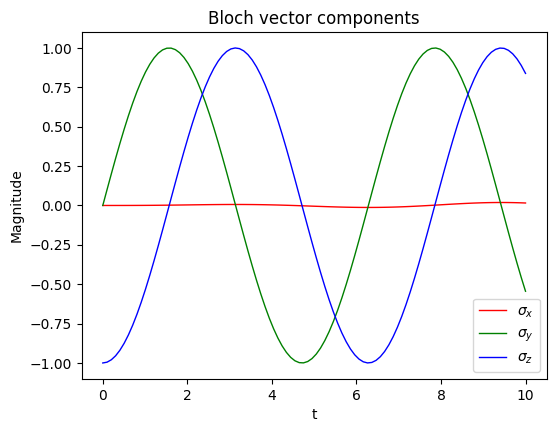

<Figure size 640x480 with 0 Axes>

In [13]:
# Plot the solution that was generated
t, sigmax, sigmay,sigmaz = loadtxt('adiabatic_passage_1.dat', unpack=True)

figure(1, figsize=(6, 4.5))

# Plotting the curves simultaneously 
lw = 1
plt.plot(t, sigmax, color='r', label=r'$\sigma_x$', linewidth=lw) 
plt.plot(t, sigmay, color='g', label=r'$\sigma_y$', linewidth=lw) 
plt.plot(t, sigmaz, color='b', label=r'$\sigma_z$', linewidth=lw) 

# Naming the x-axis, y-axis and the whole graph 
plt.xlabel("t") 
plt.ylabel("Magnitude") 
plt.title("Bloch vector components") 


# Adding legend, which helps us recognize the curve according to it's color 
plt.legend() 
  
# To load the display window 
plt.show()

plt.savefig('adiabatic_passage_1_components.png', dpi=100)

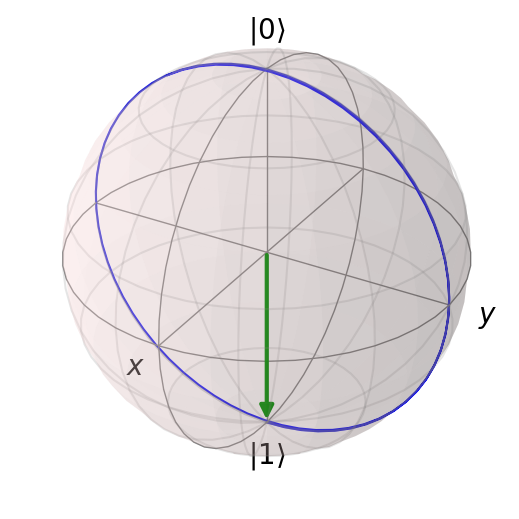

In [14]:
b = Bloch()
b.make_sphere()
#We are going to add the vector that represents the initial state and the points that correspond to the evolution
vec=[0,0,-1]
b.add_vectors(vec) #Initial state
pnts = [sigmax, sigmay,sigmaz]
b.add_points(pnts,meth='l')
b.render()
b.show()

## Case 2: Adiabatic passage without relaxation and decoherence: $ \alpha / \Omega^2 = 0.03 $

In [15]:
# Use ODEINT to solve the differential equations defined by the optical Bloch equations
from scipy.integrate import odeint

# Parameter values
# Rabi frequency:
om2=1
# Transverse decay rate
dec2 = 0
# Longitudinal decay rate
rel2=0

# Initial conditions
sigmax2=0
sigmay2=0
sigmaz2=-1

# ODE solver parameters
abserr = 1.0e-8
relerr = 1.0e-6
stoptime = 10.0
numpoints = 100

# Create the time samples for the output of the ODE solver.
# I use a large number of points, only because I want to make
# a plot of the solution that looks nice.
t = [stoptime * float(i) / (numpoints - 1) for i in range(numpoints)]

# Linear detuning
alpha2=0.03
# Pack up the parameters and initial conditions:
p2 = [om2,alpha2, rel2,dec2]
sigma02 = [sigmax2, sigmay2,sigmaz2]



# Call the ODE solver.
bloch_sol2 = odeint(optical_bloch, sigma02, t, args=(p2,),
              atol=abserr, rtol=relerr)

with open('adiabatic_passage_2.dat', 'w') as f2:
    # Print & save the solution.
    for t1, sigma2 in zip(t, bloch_sol2):
        print(t1, sigma2[0], sigma2[1], sigma2[2],file=f2);

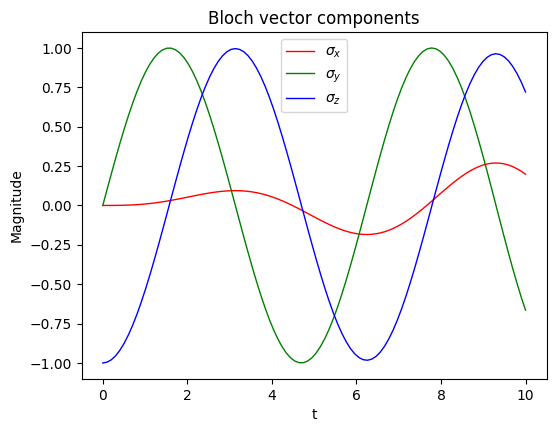

<Figure size 640x480 with 0 Axes>

In [16]:
# Plot the solution that was generated
t, sigmax, sigmay,sigmaz = loadtxt('adiabatic_passage_2.dat', unpack=True)

figure(1, figsize=(6, 4.5))

# Plotting the curves simultaneously 
lw = 1
plt.plot(t, sigmax, color='r', label=r'$\sigma_x$', linewidth=lw) 
plt.plot(t, sigmay, color='g', label=r'$\sigma_y$', linewidth=lw) 
plt.plot(t, sigmaz, color='b', label=r'$\sigma_z$', linewidth=lw) 

# Naming the x-axis, y-axis and the whole graph 
plt.xlabel("t") 
plt.ylabel("Magnitude") 
plt.title("Bloch vector components") 


# Adding legend, which helps us recognize the curve according to it's color 
plt.legend() 
  
# To load the display window 
plt.show()

plt.savefig('adiabatic_passage_2_components.png', dpi=100)

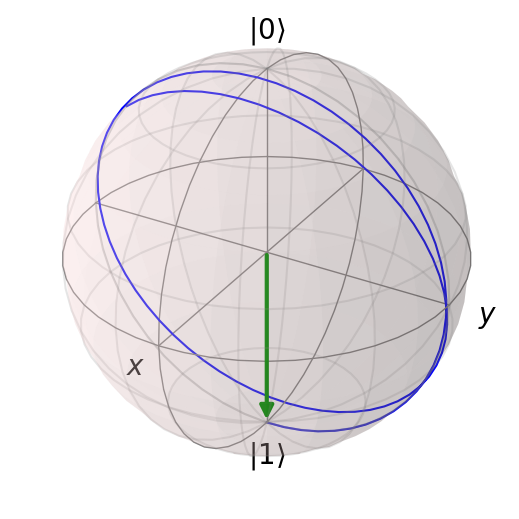

In [17]:
b2 = Bloch()
b2.make_sphere()
#We are going to add the vector that represents the initial state and the points that correspond to the evolution
vec=[0,0,-1]
b2.add_vectors(vec) #Initial state
pnts = [sigmax, sigmay,sigmaz]
b2.add_points(pnts,meth='l')
b2.render()
b2.show()

## Case 3: Adiabatic passage without relaxation and decoherence: $ \alpha / \Omega^2 = 0.1 $

In [18]:
# Use ODEINT to solve the differential equations defined by the optical Bloch equations
from scipy.integrate import odeint

# Parameter values
# Rabi frequency:
om3=1
# Transverse decay rate
dec3 = 0
# Longitudinal decay rate
rel3=0

# Initial conditions
sigmax3=0
sigmay3=0
sigmaz3=-1

# ODE solver parameters
abserr = 1.0e-8
relerr = 1.0e-6
stoptime = 10.0
numpoints = 100

# Create the time samples for the output of the ODE solver.
# I use a large number of points, only because I want to make
# a plot of the solution that looks nice.
t = [stoptime * float(i) / (numpoints - 1) for i in range(numpoints)]

# Linear detuning
alpha3=0.1
# Pack up the parameters and initial conditions:
p3 = [om3,alpha3, rel3,dec3]
sigma03 = [sigmax3, sigmay3,sigmaz3]



# Call the ODE solver.
bloch_sol3 = odeint(optical_bloch, sigma03, t, args=(p3,),
              atol=abserr, rtol=relerr)

with open('adiabatic_passage_3.dat', 'w') as f3:
    # Print & save the solution.
    for t1, sigma3 in zip(t, bloch_sol3):
        print(t1, sigma3[0], sigma3[1], sigma3[2],file=f3);

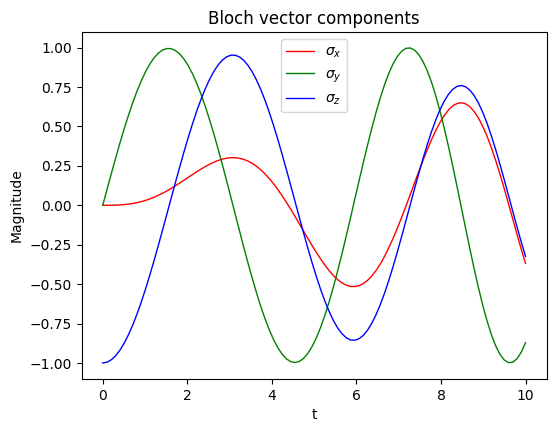

<Figure size 640x480 with 0 Axes>

In [19]:
# Plot the solution that was generated
t, sigmax, sigmay,sigmaz = loadtxt('adiabatic_passage_3.dat', unpack=True)

figure(1, figsize=(6, 4.5))

# Plotting the curves simultaneously 
lw = 1
plt.plot(t, sigmax, color='r', label=r'$\sigma_x$', linewidth=lw) 
plt.plot(t, sigmay, color='g', label=r'$\sigma_y$', linewidth=lw) 
plt.plot(t, sigmaz, color='b', label=r'$\sigma_z$', linewidth=lw) 

# Naming the x-axis, y-axis and the whole graph 
plt.xlabel("t") 
plt.ylabel("Magnitude") 
plt.title("Bloch vector components") 


# Adding legend, which helps us recognize the curve according to it's color 
plt.legend() 
  
# To load the display window 
plt.show()

plt.savefig('adiabatic_passage_3_components.png', dpi=100)

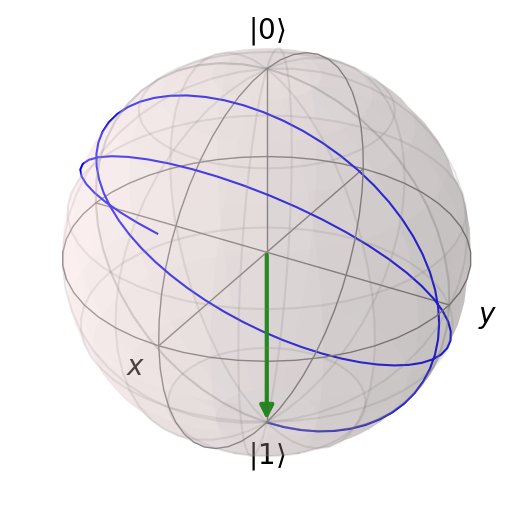

In [20]:
b3 = Bloch()
b3.make_sphere()
#We are going to add the vector that represents the initial state and the points that correspond to the evolution
vec=[0,0,-1]
b3.add_vectors(vec) #Initial state
pnts = [sigmax, sigmay,sigmaz]
b3.add_points(pnts,meth='l')
b3.render()
b3.show()

## Case 4: Adiabatic passage without relaxation and decoherence: $ \alpha / \Omega^2 = 2 $

In [21]:
# Use ODEINT to solve the differential equations defined by the optical Bloch equations
from scipy.integrate import odeint

# Parameter values
# Rabi frequency:
om4=1
# Transverse decay rate
dec4 = 0
# Longitudinal decay rate
rel4=0

# Initial conditions
sigmax4=0
sigmay4=0
sigmaz4=-1

# ODE solver parameters
abserr = 1.0e-8
relerr = 1.0e-6
stoptime = 10.0
numpoints = 100

# Create the time samples for the output of the ODE solver.
# I use a large number of points, only because I want to make
# a plot of the solution that looks nice.
t = [stoptime * float(i) / (numpoints - 1) for i in range(numpoints)]

# Linear detuning
alpha4=2
# Pack up the parameters and initial conditions:
p4 = [om4,alpha4, rel4,dec4]
sigma04 = [sigmax4, sigmay4,sigmaz4]



# Call the ODE solver.
bloch_sol4 = odeint(optical_bloch, sigma04, t, args=(p4,),
              atol=abserr, rtol=relerr)

with open('adiabatic_passage_4.dat', 'w') as f4:
    # Print & save the solution.
    for t1, sigma4 in zip(t, bloch_sol4):
        print(t1, sigma4[0], sigma4[1], sigma4[2],file=f4);

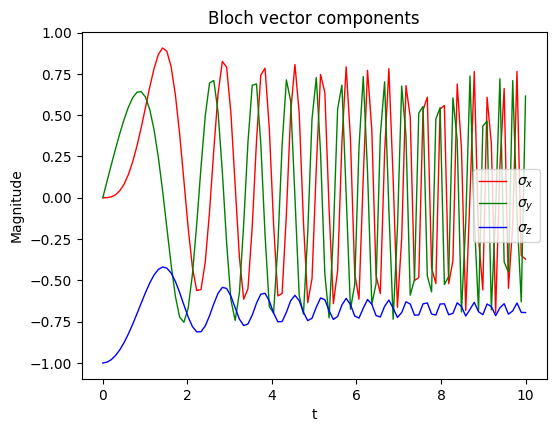

<Figure size 640x480 with 0 Axes>

In [22]:
# Plot the solution that was generated
t, sigmax, sigmay,sigmaz = loadtxt('adiabatic_passage_4.dat', unpack=True)

figure(1, figsize=(6, 4.5))

# Plotting the curves simultaneously 
lw = 1
plt.plot(t, sigmax, color='r', label=r'$\sigma_x$', linewidth=lw) 
plt.plot(t, sigmay, color='g', label=r'$\sigma_y$', linewidth=lw) 
plt.plot(t, sigmaz, color='b', label=r'$\sigma_z$', linewidth=lw) 

# Naming the x-axis, y-axis and the whole graph 
plt.xlabel("t") 
plt.ylabel("Magnitude") 
plt.title("Bloch vector components") 


# Adding legend, which helps us recognize the curve according to it's color 
plt.legend() 
  
# To load the display window 
plt.show()

plt.savefig('adiabatic_passage_4_components.png', dpi=100)

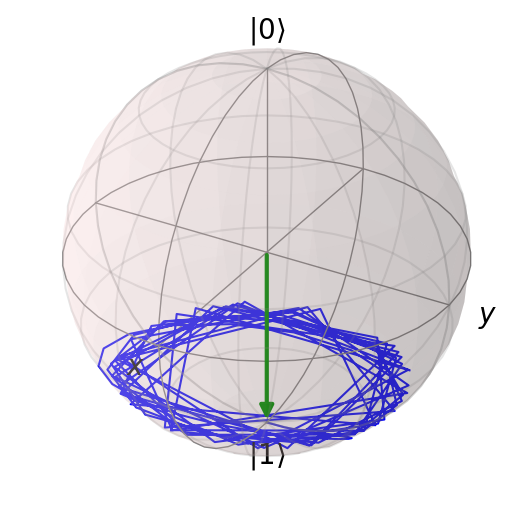

In [23]:
b4 = Bloch()
b4.make_sphere()
#We are going to add the vector that represents the initial state and the points that correspond to the evolution
vec=[0,0,-1]
b4.add_vectors(vec) #Initial state
pnts = [sigmax, sigmay,sigmaz]
b4.add_points(pnts,meth='l')
b4.render()
b4.show()

## Case 5: Adiabatic passage with relaxation and decoherence: $ \alpha / \Omega^2 = 0.002 $, $ \gamma / \Omega = 0.001 $, $ \Gamma / \Omega = 0.002 $

In [24]:
# Use ODEINT to solve the differential equations defined by the optical Bloch equations
from scipy.integrate import odeint

# Parameter values
# Rabi frequency:
om5=1
# Transverse decay rate
dec5 = 0.001
# Longitudinal decay rate
rel5=0.002

# Initial conditions
sigmax5=0
sigmay5=0
sigmaz5=-1

# ODE solver parameters
abserr = 1.0e-8
relerr = 1.0e-6
stoptime = 10.0
numpoints = 100

# Create the time samples for the output of the ODE solver.
# I use a large number of points, only because I want to make
# a plot of the solution that looks nice.
t = [stoptime * float(i) / (numpoints - 1) for i in range(numpoints)]

# Linear detuning
alpha5=0.002
# Pack up the parameters and initial conditions:
p5 = [om5,alpha5, rel5,dec5]
sigma05 = [sigmax5, sigmay5,sigmaz5]



# Call the ODE solver.
bloch_sol5 = odeint(optical_bloch, sigma05, t, args=(p5,),
              atol=abserr, rtol=relerr)

with open('adiabatic_passage_5.dat', 'w') as f5:
    # Print & save the solution.
    for t1, sigma5 in zip(t, bloch_sol5):
        print(t1, sigma5[0], sigma5[1], sigma5[2],file=f5);

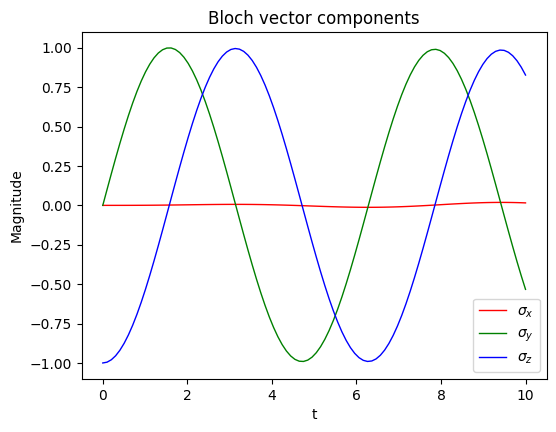

<Figure size 640x480 with 0 Axes>

In [25]:
# Plot the solution that was generated
t, sigmax, sigmay,sigmaz = loadtxt('adiabatic_passage_5.dat', unpack=True)

figure(1, figsize=(6, 4.5))

# Plotting the curves simultaneously 
lw = 1
plt.plot(t, sigmax, color='r', label=r'$\sigma_x$', linewidth=lw) 
plt.plot(t, sigmay, color='g', label=r'$\sigma_y$', linewidth=lw) 
plt.plot(t, sigmaz, color='b', label=r'$\sigma_z$', linewidth=lw) 

# Naming the x-axis, y-axis and the whole graph 
plt.xlabel("t") 
plt.ylabel("Magnitude") 
plt.title("Bloch vector components") 


# Adding legend, which helps us recognize the curve according to it's color 
plt.legend() 
  
# To load the display window 
plt.show()

plt.savefig('adiabatic_passage_5_components.png', dpi=100)

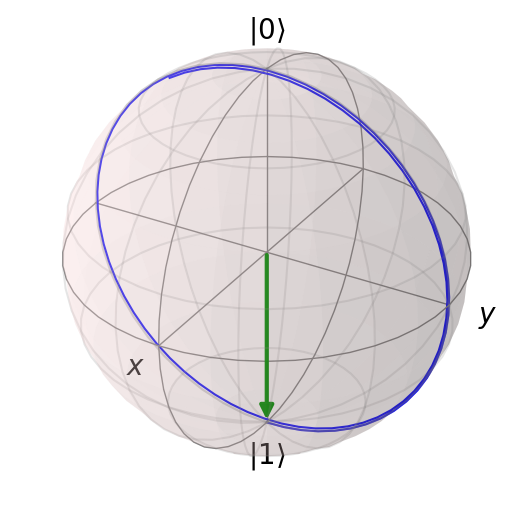

In [26]:
b5 = Bloch()
b5.make_sphere()
#We are going to add the vector that represents the initial state and the points that correspond to the evolution
vec=[0,0,-1]
b5.add_vectors(vec) #Initial state
pnts = [sigmax, sigmay,sigmaz]
b5.add_points(pnts,meth='l')
b5.render()
b5.show()

## Case 6: Adiabatic passage with relaxation and decoherence: $ \alpha / \Omega^2 = 0.5 $, $ \gamma / \Omega = 0.15 $, $ \Gamma / \Omega = 0.3 $

In [45]:
# Use ODEINT to solve the differential equations defined by the optical Bloch equations
from scipy.integrate import odeint

# Parameter values
# Rabi frequency:
om6=1
# Transverse decay rate
dec6 = 0.15
# Longitudinal decay rate
rel6=0.3

# Initial conditions
sigmax6=0
sigmay6=0
sigmaz6=-1

# ODE solver parameters
abserr = 1.0e-8
relerr = 1.0e-6
stoptime = 10.0
numpoints = 100

# Create the time samples for the output of the ODE solver.
# I use a large number of points, only because I want to make
# a plot of the solution that looks nice.
t = [stoptime * float(i) / (numpoints - 1) for i in range(numpoints)]

# Linear detuning
alpha6=0.5
# Pack up the parameters and initial conditions:
p6 = [om6,alpha6, rel6,dec6]
sigma06 = [sigmax6, sigmay6,sigmaz6]



# Call the ODE solver.
bloch_sol6 = odeint(optical_bloch, sigma06, t, args=(p6,),
              atol=abserr, rtol=relerr)

with open('adiabatic_passage_6.dat', 'w') as f6:
    # Print & save the solution.
    for t1, sigma6 in zip(t, bloch_sol6):
        print(t1, sigma6[0], sigma6[1], sigma6[2],file=f6);

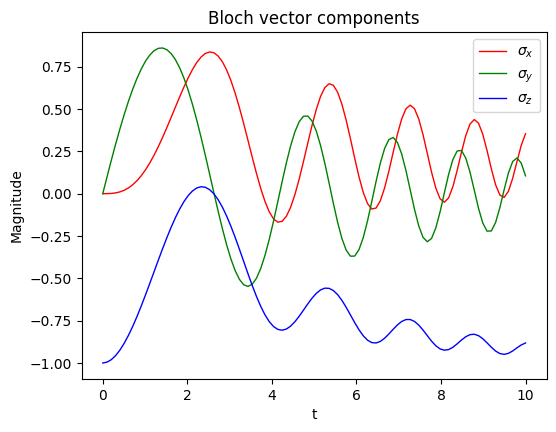

<Figure size 640x480 with 0 Axes>

In [46]:
# Plot the solution that was generated
t, sigmax, sigmay,sigmaz = loadtxt('adiabatic_passage_6.dat', unpack=True)

figure(1, figsize=(6, 4.5))

# Plotting the curves simultaneously 
lw = 1
plt.plot(t, sigmax, color='r', label=r'$\sigma_x$', linewidth=lw) 
plt.plot(t, sigmay, color='g', label=r'$\sigma_y$', linewidth=lw) 
plt.plot(t, sigmaz, color='b', label=r'$\sigma_z$', linewidth=lw) 

# Naming the x-axis, y-axis and the whole graph 
plt.xlabel("t") 
plt.ylabel("Magnitude") 
plt.title("Bloch vector components") 


# Adding legend, which helps us recognize the curve according to it's color 
plt.legend() 
  
# To load the display window 
plt.show()

plt.savefig('adiabatic_passage_6_components.png', dpi=100)

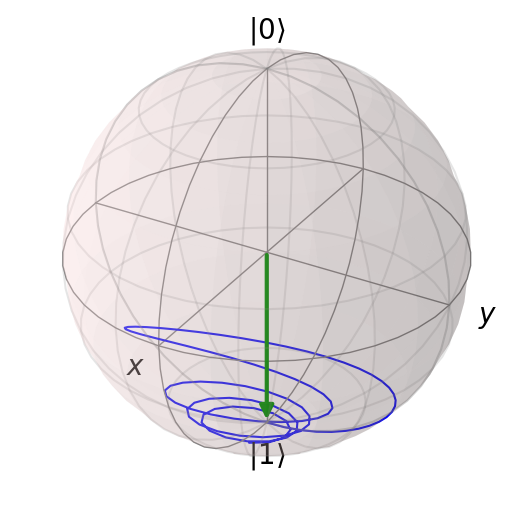

In [47]:
b6 = Bloch()
b6.make_sphere()
#We are going to add the vector that represents the initial state and the points that correspond to the evolution
vec=[0,0,-1]
b6.add_vectors(vec) #Initial state
pnts = [sigmax, sigmay,sigmaz]
b6.add_points(pnts,meth='l')
b6.render()
b6.show()